# Dimension Reduction with PCA
## -- by Charlie Chengrui Zheng 01/20/21
When you have a extremely large dataset, it is slow to train and predict the dataset with your machine learning model. How can you enhance the performance of this machine learning process? One way of solving this problem is to reduce the dimension of the feature set.

Principal component analysis (PCA) is the most common method for dimension reduction. In this article I will use PCA to showcase dimension reduction on 'banknote authentication' dataset from [UCI Machine Learning Repository]('https://archive.ics.uci.edu/ml/datasets/banknote+authentication')

## Dataset
This dataset contains 1372 rows × 5 columns. The last column 'class' is the target set and the first 4 columns are the 4 dimensions of the feature set. For the description of the columns, please refer to the repository link above. This is a great dataset for binary classification because the class is either 0 or 1. However, I will not focus on classify this dataset but to reduce the dimensionality of the feature set.

In [153]:
import pandas as pd
header_list=['variance', 'skewness','curtosis','entropy','class']
df = pd.read_csv('data_banknote_authentication.txt', sep=",",header=None,names=header_list)
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


To preprocess this dataset, we need to first divide the dataset according the 2 classes

In [154]:
X = df.iloc[:,:-1]
y = df['class']
classes = {}
for q in y.unique():
    index = []
    for i in range(len(y)):
        if y[i] == q:
            index.append(i)
    classes[q]=index

Since the values of the featureset are continous, we can assume Gaussian distribusion on these data. We need to standardize the featureset.

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=features.columns)
X

,0,1,2,3
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


## PCA
To conduct a Principal Component Analysis, we are trying to project the data onto Principal Components, the linearly uncorrelated orthogonal axes. We want our Principal Components to captures as much variance as possible in order to have the best dimensionality-reduced representation of the dataset. Therefore, when we do a PCA, we need to check the proportion of variance explained by each component and decide which component to use. Here is the example of the 4 principal components of our dataset.

In [159]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
X_ = pca.fit_transform(X)
percentage = np.round(pca.explained_variance_ratio_, decimals=4)
for i, percent in zip(range(4),percentage):
    print(f'The proportion of variance explained by PC{i+1}: {percent}')

The proportion of variance explained by PC1: 0.545
The proportion of variance explained by PC2: 0.3233
The proportion of variance explained by PC3: 0.0878
The proportion of variance explained by PC4: 0.0439


We can see that PC1 explains the most proportion of variance, and PC2 explains major proportion. However, PC3 and PC4 explains little proportion of variance. Therefore, we can discard PC3 and PC4, reducing the dimensionality of the dataset from 4 to 2. The sum of the proportion of variance explained by PC1 and PC2 is 0.8683  

**In this way, we cut half of the size of the original dataset by explaining 86.83% its variance. Because it is now 2-Dimensional, we can even visualize the new dataset.** Here is the new feature set:

In [157]:
pca = PCA(n_components=2)
Principal_components=pca.fit_transform(X)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-1.472805,-1.163917
1,-1.639441,-1.093812
2,0.513919,-1.324880
3,-2.310952,-0.202514
4,1.193416,0.024654
...,...,...
1367,-0.221995,-0.290458
1368,1.909395,0.142149
1369,4.049327,2.036023
1370,3.019617,1.392140


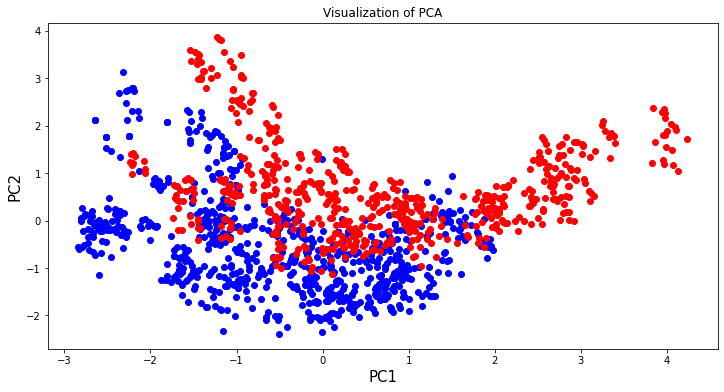

In [160]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
# defining axes
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
#scatter the datapoints
x0 = pca_df.loc[classes[0]].PC1 
y0 = pca_df.loc[classes[0]].PC2
ax.scatter(x0, y0, color = 'b')

x1 = pca_df.loc[classes[1]].PC1 
y1 = pca_df.loc[classes[1]].PC2
ax.scatter(x1, y1, color = 'r') 

ax.set_title('Visualization of PCA') 
plt.show()

From the graph above, we can see that our classes are roughly separable by the 2 PCs. We successfully have a new dataset that have reduced-size, and is good for classification.